# Ford GoBike System Exploratory Data Analysis
## by Wahab Hamed Ayomide

  

## Preliminary Wrangling
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset into a dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#exploring the data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#checking the data structure
df.shape

(183412, 16)

In [5]:
#checking the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
#descriptive statistics of the variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
#checking for duplicates
sum(df.duplicated())

0

There are no duplicates in the dataset

In [8]:
#checking for null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

> There are 183,412 rides (rows) made in the dataset with 16 details ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip') about the rides.

### What is/are the main feature(s) of interest in your dataset?

>  I am most interested in figuring out:
- The time of day, day of the week that most rides are taken.
- The type of users taking the rides.
- The duration of the rides.

The main features of interest would be the start_time, user_type and duration_sec.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe extracting the time of the day and day of the week from the start_time will help in accessing the time of the day and days of the week most rides are taken. It could also be expected that the user_type would be able to help in answering the type of users taking the rides and the duration_sec would help in determining the duration of the rides. The gender (member_gender) of the riders could also support my investigation.

In [9]:
#dropping irrelevant columns to the analysis
df.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude',
         'end_station_longitude', 'bike_id', 'bike_share_for_all_trip', 'member_birth_year'], axis=1, inplace=True)
df.head(3)

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_gender
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male


In [10]:
#changing the start time and end time to datetime datatype
df.start_time = pd.to_datetime(df['start_time'])
df.end_time = pd.to_datetime(df['end_time'])

In [11]:
#adding a derived column for days of the week
df['day_of_week'] = df.apply(lambda row: row.start_time.day_name(), axis = 1)

#creating a time of day column i.e morning, afternoon, evening and night
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['day_time'] = 'Morning'
df['day_time'][(df['start_hour'] >= 12) & (df['start_hour'] <= 16)] = 'Afternoon'
df['day_time'][(df['start_hour'] > 16) & (df['start_hour'] <= 19)] = 'Evening'
df['day_time'][(df['start_hour'] > 19) & (df['start_hour'] <= 23)] = 'Night'

#checking the changes made
df.head(3)

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,day_of_week,start_hour,day_time
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,Thursday,17,Evening
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,Thursday,18,Evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,Thursday,12,Afternoon


## Univariate Exploration

I will start by looking at the distribution of the main variables of interest: time_of_day, day_of_week, user_type and duration_sec. Also, member_gender which could support my investigation.

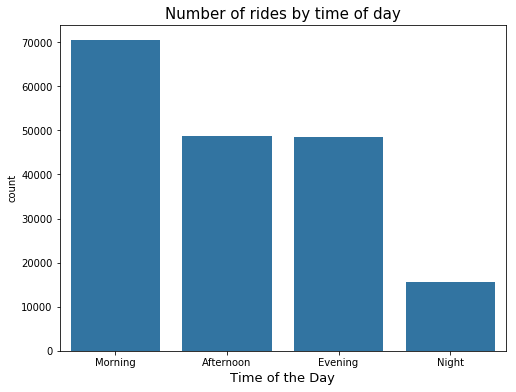

In [12]:
# plot a distribution of the number of rides by time of day
base_color = sns.color_palette()[0]
time = ['Morning', 'Afternoon', 'Evening', 'Night']
plt.figure(figsize=[8, 6])
sns.countplot(data = df, x = 'day_time', order = time, color = base_color);
plt.title('Number of rides by time of day', fontsize = 15)
plt.xlabel('Time of the Day', fontsize = 13)
plt.show()

It could be seen from the plot that the time of the day with the most rides is Morning (00:00 - 11:59 hours of the day) followed by Afternoon and Evening, then Night. Understandably, the least number of rides are taken in the night. Further analysis will be done to see if this is probably influenced by user types(subscriber and customer).

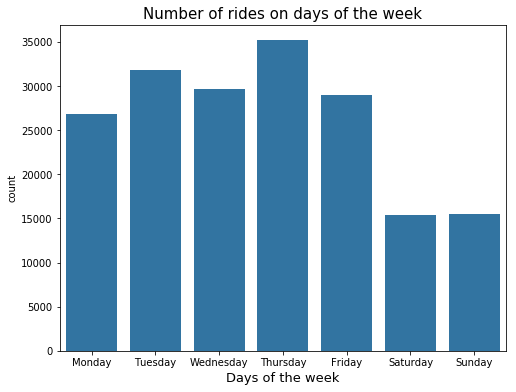

In [13]:
# plot a distribution of the number of rides on days of the week
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[8, 6])
sns.countplot(data = df, x = 'day_of_week', order=weekday, color = base_color);
plt.title('Number of rides on days of the week', fontsize=15)
plt.xlabel('Days of the week', fontsize = 13)
plt.show()

From the plot, it is evident that the day of the week with the most rides is Thursday. Likewise, it could be seen that Saturday and Sunday have the least number of trips which is quite reasonable considering the fact they are weekends and not work-days. Further analysis would be done to see how the user type and gender are distributed amongst the days of the week.

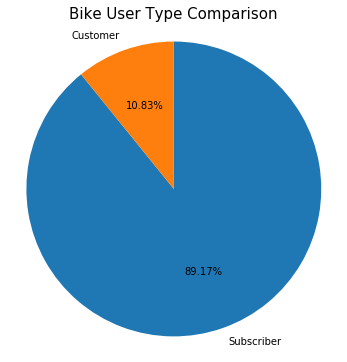

In [14]:
# plot a distribution of the number of rides by user type
plt.figure(figsize=(8,6))
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Type Comparison', fontsize=15);

As evidently seen from the plot, most trips (about 89%) are taken by the subscribers with the remaining (about 11%) being just casual riders.  Assumptions can be made as to Subscribers might be using the bikes for daily commute to work while Customers just use it for leisure or exercising activities. Hence the higher number of subscribers compared to the Customers.

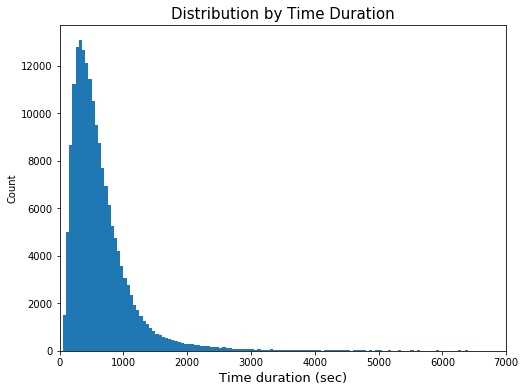

In [15]:
# plot a distribution by the time duration used by riders
binsize = 50
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xlim(0, 7000)
plt.xlabel('Time duration (sec)', fontsize = 13)
plt.ylabel('Count')
plt.title('Distribution by Time Duration', fontsize = 15)
plt.show()

The duration of the rides distribution is highly right-skewed and insights are difficult to deduce from the plot.

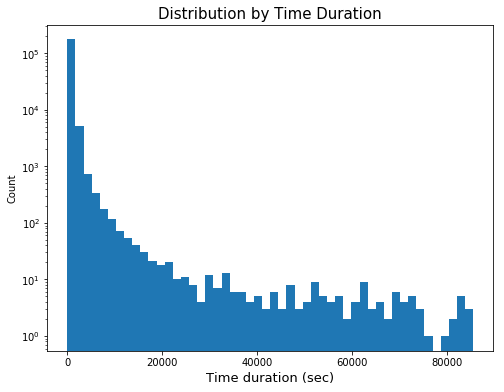

In [16]:
#decresing the bin and applying logarithmic scaling
plt.figure(figsize=[8, 6])
df.duration_sec.hist(bins=50, log=True)
plt.grid(b=None)
plt.xlabel('Time duration (sec)', fontsize = 13)
plt.ylabel('Count')
plt.title('Distribution by Time Duration', fontsize = 15)
plt.show()

After applying the logarithmic scaling of the histogram, it clearly seems like the distribution is right-skewed and majority of the rides were less than 40000 seconds in duration. Now, I will explore the start_hour to see if insights can be deduced.

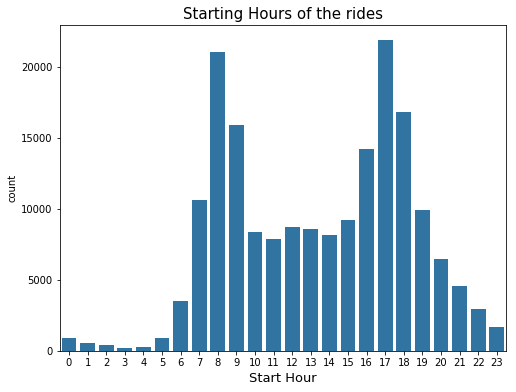

In [17]:
# plot a distribution of the starting hours of the rides
plt.figure(figsize=[8, 6])
sns.countplot(data = df, x = 'start_hour', color = base_color)
plt.title('Starting Hours of the rides', fontsize = 15 )
plt.xlabel('Start Hour', fontsize = 13)
plt.show()

From the above barchart, it could be seen that trips are started mostly between 8am (08:00 hours) and 5pm (17:00 hours). This is highly justifiable as these hours correspond to the hours people leave for work and home respectively.

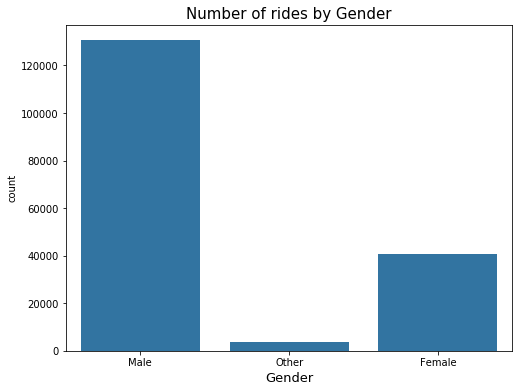

In [18]:
# plot a distribution of the number of rides by gender
plt.figure(figsize=[8, 6])
sns.countplot(data = df, x = 'member_gender', color = base_color)
plt.xlabel('Gender', fontsize=13)
plt.title('Number of rides by Gender', fontsize=15);

Majority of the riders are Males and are significantly more than the females, while minority of the gender are regarded as other.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The time of the day with the most rides is Morning (00:00 - 11:59 hours) while Night (19:01 - 23:00) had the least number of rides.
- The day of the week with the most rides is Thursday while the least number of rides are taken during weekends (Saturday and Sunday). Most of the people take rides during weekdays (Monday to Friday) compared to weekends.
- Most rides (about 89%) are taken by the subscribers and about 11% are taken by customers, and would like to further investigate if this also influences the duration of the rides.
- Majority of the rides are less than 40000 seconds in duration.
- Rides are started mostly between 8am in the morning and 5pm in the evening.
- Majority of the riders are male which is about 75% of the gender population.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Datatypes of data/time related variables were changed to the appropriate ones.
- Had to add some columns (start_hour, day_of_week, day_time) to extend our time-based analysis.
- Dropped variables in the dataset that were not of interest for exploration.

## Bivariate Exploration


I want to explore the correlation between the numerical variables in the data.

In [19]:
numeric_vars = ['start_hour', 'duration_sec']
categoric_vars = ['user_type', 'day_of_week', 'day_time']

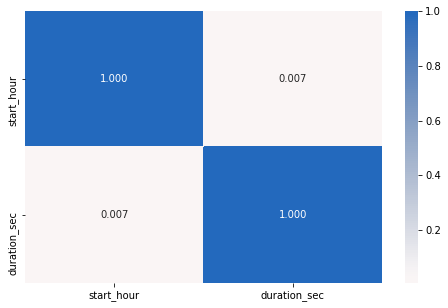

In [20]:
#plot the correlation
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

As it could be seen from the plot, there is no correlation between 'start_hour' and 'duration_sec'

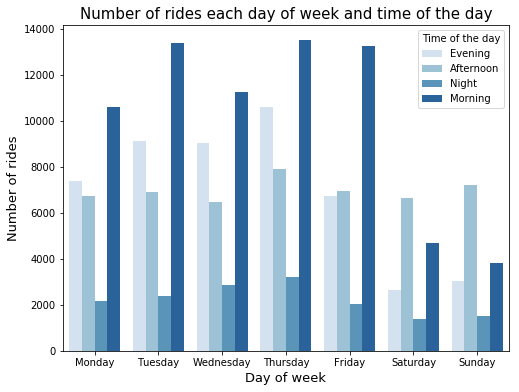

In [21]:
#plot the distribution of rides each day and the time of the day
plt.figure(figsize=[8, 6])
sns.countplot(data = df, x = 'day_of_week', hue = 'day_time', palette = 'Blues', order = weekday)
plt.xlabel('Day of week', fontsize=13)
plt.ylabel('Number of rides', fontsize=13)
plt.title('Number of rides each day of week and time of the day', fontsize=15)
plt.legend(title = 'Time of the day');

As seen from the plot, majority of the rides taken on weekdays (Monday to Friday) happen in the morning which would suggest people ride to work while on weekends (Saturday and Sunday), majority of the rides happen in the afternoon.

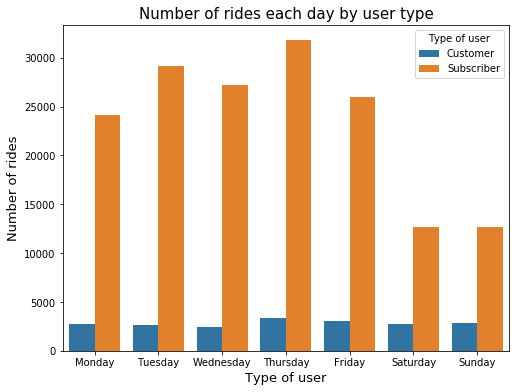

In [22]:
#plot the distribution of number of rider each day by user type
plt.figure(figsize=[8, 6])
sns.countplot(data = df, x = 'day_of_week', hue = 'user_type', order = weekday)
plt.xlabel('Type of user', fontsize=13)
plt.ylabel('Number of rides', fontsize=13)
plt.title('Number of rides each day by user type', fontsize=15)
plt.legend(title = 'Type of user');

From the above bar graph, the day of the week that most rides are taken (Thursday) is not dependent on if the user is a subscriber or a customer. Although, we can see the reduced number of rides from subscribers on weekends. This could mean our earlier assumption that subscribers might be regularly using the bikes for work and home commute purposes and customers use it for recreational or exercise activities during weekends is plausible.

,user_type,duration_sec
0,Customer,1432.465019
1,Subscriber,640.263678


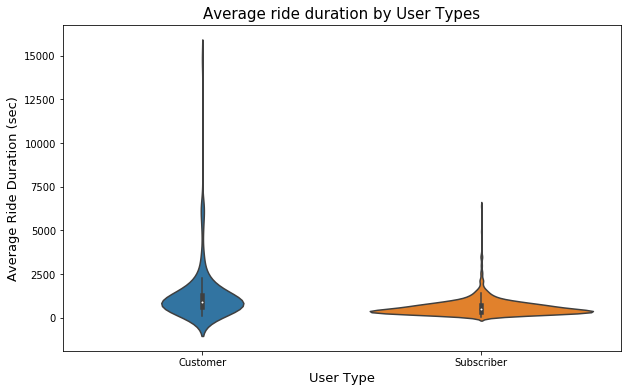

In [23]:
#plot the relationship between user type and duration
np.random.seed(1)
df_samp = df.sample(1500)

user_type_duration = df[['user_type','duration_sec']].groupby(['user_type'],as_index= False).mean()
# show analysis
display(user_type_duration)

plt.figure(figsize=(10,6))
sns.violinplot(x='user_type', y='duration_sec', data=df_samp)
plt.title("Average ride duration by User Types", fontsize=15)
plt.xlabel('User Type', fontsize=13)
plt.ylabel("Average Ride Duration (sec)", fontsize=13)
plt.show()

Subscriber users tend to ride the bikes in lesser duration than customer users. This might be because the subscriber users ride the bikes for regular commutes - work and school, but the customer users might be tourists that use the bikes for touring around San Francisco. The average ride duration is significantly dependent on if the user is a subscriber or just a customer. Customers have two times ride duration of the subscribers. Since Customers mostly go on trips by weekends, it is expected that average ride duration should then be the highest on weekends. Further analysis would be done to confirm.

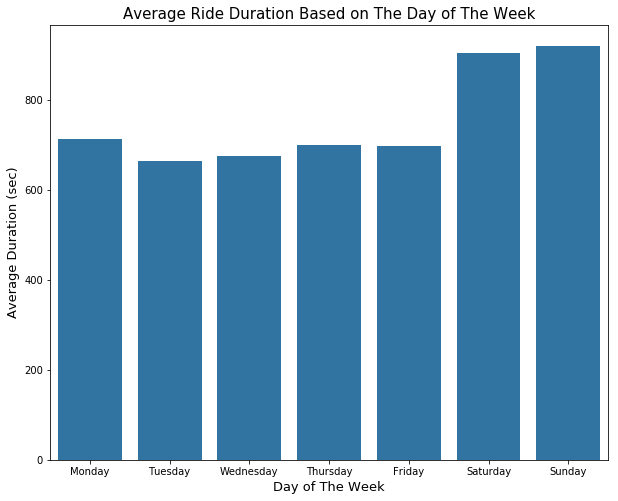

In [24]:
#plot the distribution of the average ride duration based on the day of the week
weekday_avg_sec = df[['day_of_week','duration_sec']].groupby(['day_of_week'],as_index= False).mean()
# plot a line plot
plt.figure(figsize=[10,8])
sns.barplot(data=weekday_avg_sec, x='day_of_week', y='duration_sec', color = base_color, order = weekday)
plt.ylabel('Average Duration (sec)', fontsize=13);
plt.xlabel('Day of The Week', fontsize=13)
plt.title('Average Ride Duration Based on The Day of The Week', fontsize=15)
plt.show()

As expected, Saturdays and Sundays have the longest ride duration since the weekends are majorly used by the customers.

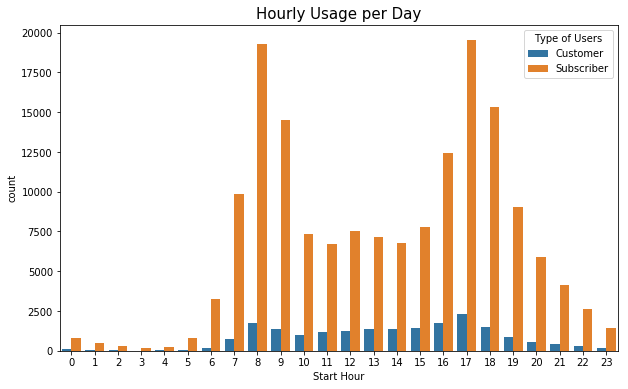

In [25]:
#plot the hour usage per day distribution
plt.figure(figsize=(10,6))
chart = sns.countplot(data=df, x='start_hour', hue='user_type')
plt.title('Hourly Usage per Day', fontsize=15)
chart.set(xlabel='Start Hour', ylabel='count')
plt.legend(title = 'Type of Users')
plt.show()

Most Subscribers use the service at peak hour (8am and 5pm). In contrast, Customers have more flexible time mostly in early hours of the evening (5pm)

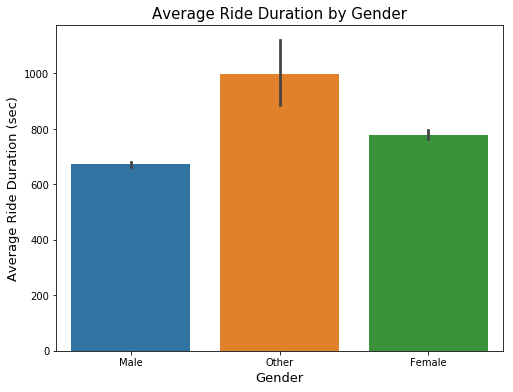

In [26]:
#plot the average ride duration by gender
plt.figure(figsize=(8,6))
sns.barplot(x='member_gender', y='duration_sec', data=df)
plt.title("Average Ride Duration by Gender", fontsize = 15)
plt.xlabel('Gender', fontsize = 13)
plt.ylabel("Average Ride Duration (sec)", fontsize=13)
plt.show()

Although the larger percentage of the riders are male, females tend to go on longer rides. Also, the 'Other' gender has the highest ride duration on average. Due to the limited information about the other gender, further investigation would not be done to avoid overbiases in the analysis.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- There is no correlation between when the riders start their ride and how long the ride took.
- The number of rides taken in the morning is much more than ones taken in afternoon or evening during weekdays while on the weekends the number of rides in afternoon are more than ones taken during morning, evening or night.
- The day of the week that most trips are taken (Thursday) is not dependent on if the user is a subscriber or a customer. However, it was discovered that Subscribers mostly used bikes on weekdays (Monday - Friday), while customers bikes usage was about the same for the whole week with a significant increase on Saturday and Sunday (weekends).
- On average, subscriber users tend to ride the bikes in lesser duration than customer users.
- Saturdays and Sundays have the longest avaerage ride duration among the days of the week since the weekends are majorly used by the customers.
- Most rides for subscribers started at 8am and 5pm while customer rides were more flexible but most started at 5pm.
        

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The "other" gender had the highest ride duration, followed by the female while the male had the least ride duration. 

## Multivariate Exploration



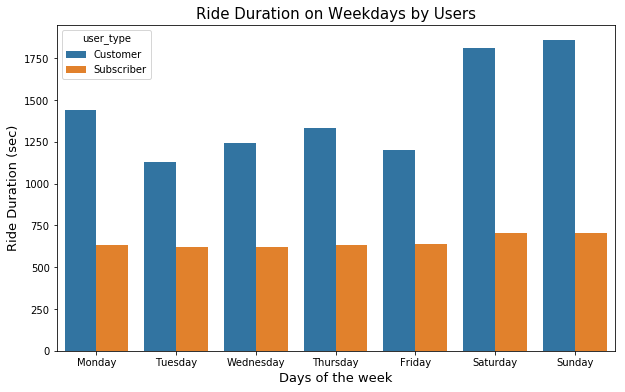

In [27]:
#plot the ride duration on days of the week by users
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day_of_week', y='duration_sec', ci=None, hue='user_type', order = weekday)
plt.title('Ride Duration on Weekdays by Users', fontsize=15);
plt.xlabel ('Days of the week', fontsize=13)
plt.ylabel('Ride Duration (sec)', fontsize=13)
plt.show()

On each day of the week, customer rides lasted longer than the subscriber users and even more significantly on weekends.

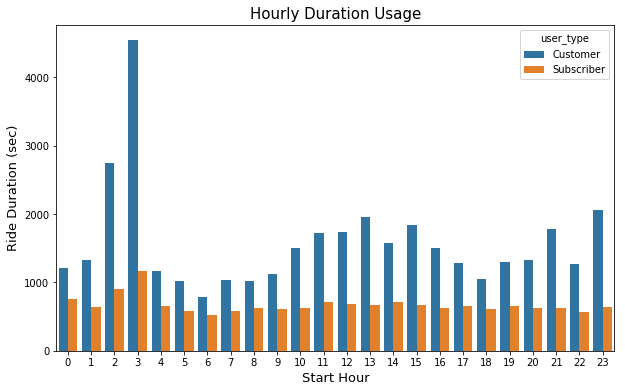

In [28]:
#plot the hourly duration usage
plt.figure(figsize=(10,6))
plt.title('Hourly Duration Usage', fontsize=15)
sns.barplot(data=df, x='start_hour', y='duration_sec', ci=None, hue='user_type')
plt.xlabel ('Start Hour', fontsize=13)
plt.ylabel('Ride Duration (sec)', fontsize=13)
plt.show()

Subscribers tend to have stable ride durations at the across the starting hours while the Customers have a rather flexible ride durations across the starting hours albeit much more ride duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Further analysis strengthened the earlier observations of the relationship between the user_type, the ride duration, days of the week and the starting hours in this exploration. It showed that on average, customers rides lasted longer than subscribers rides on every day of the week. Also, subscribers tend to have stable ride durations at the across the starting hours while the customers have relatively flexible ride durations.

### Were there any interesting or surprising interactions between features?

> Surprisingly, the ride duration at 3AM was the highest of the starting hours.